<a href="https://colab.research.google.com/github/Thanveerahamed-14/mlproject/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values before imputation:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Summary statistics before preprocessing:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.0

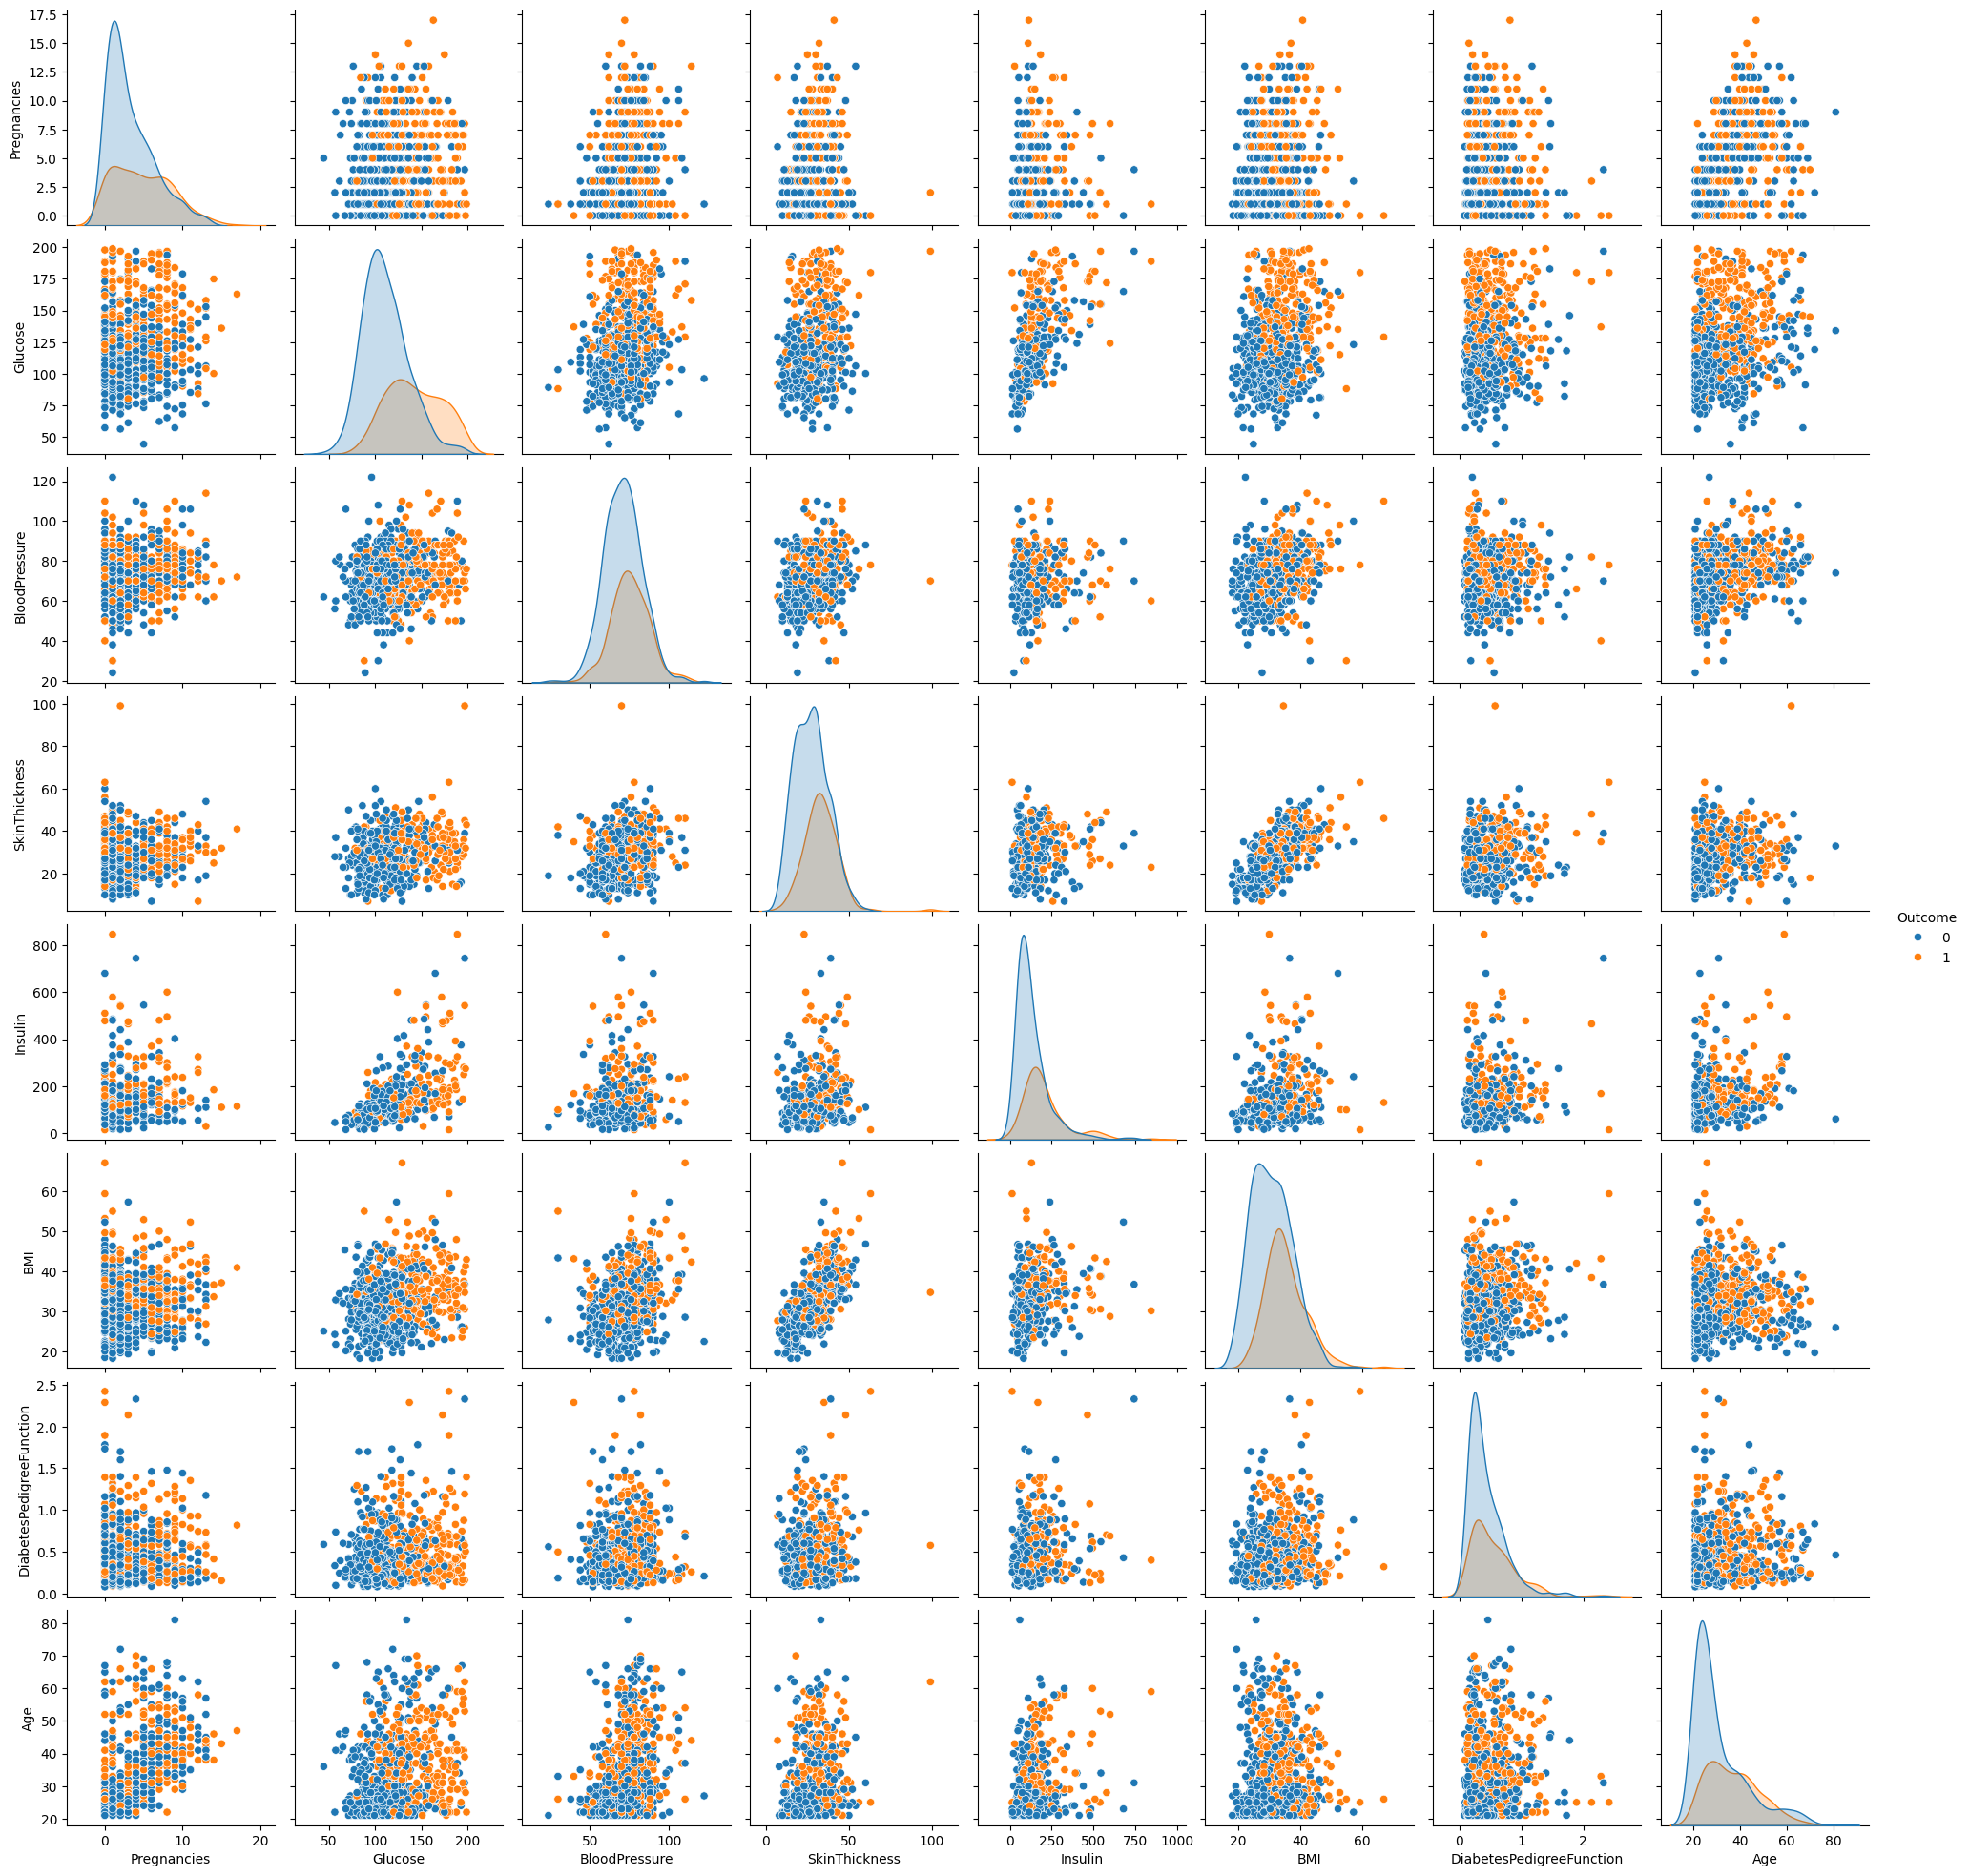

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

# Display the first few rows
data.head()

# Checking for missing values
print("Missing values before imputation:\n", data.isnull().sum())

# Summary statistics before preprocessing
print("\nSummary statistics before preprocessing:\n", data.describe())

# Visualizing the distribution of the dataset (before preprocessing)
sns.pairplot(data, hue='Outcome')
plt.show()



Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


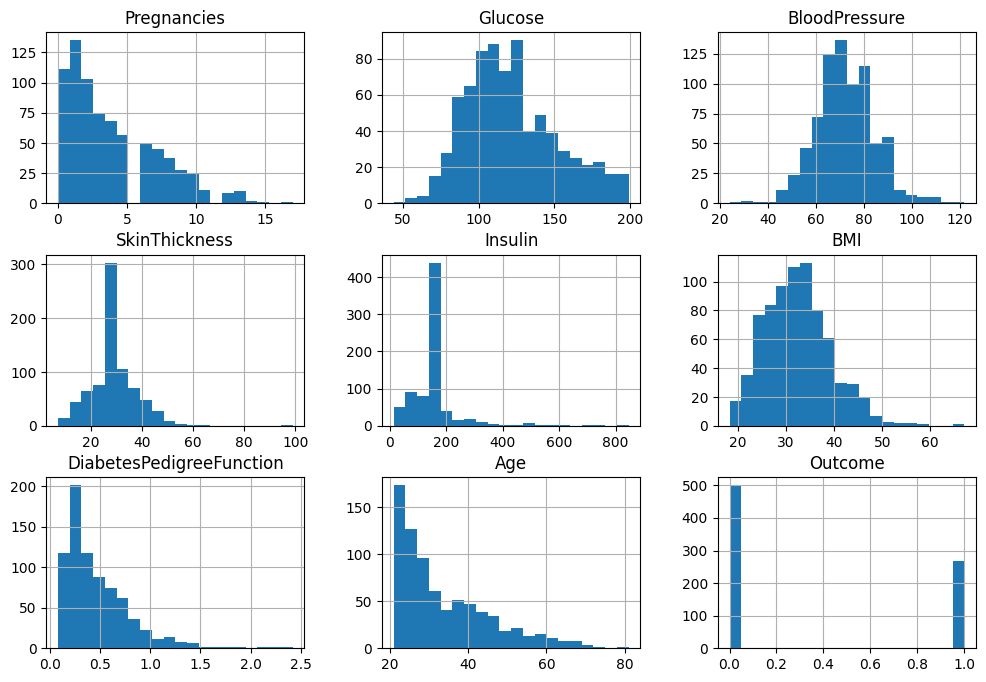

In [2]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)

# Checking if missing values are handled
print("\nMissing values after imputation:\n", data.isnull().sum())

# Plotting histograms after missing value imputation
data.hist(figsize=(12, 8), bins=20)
plt.show()


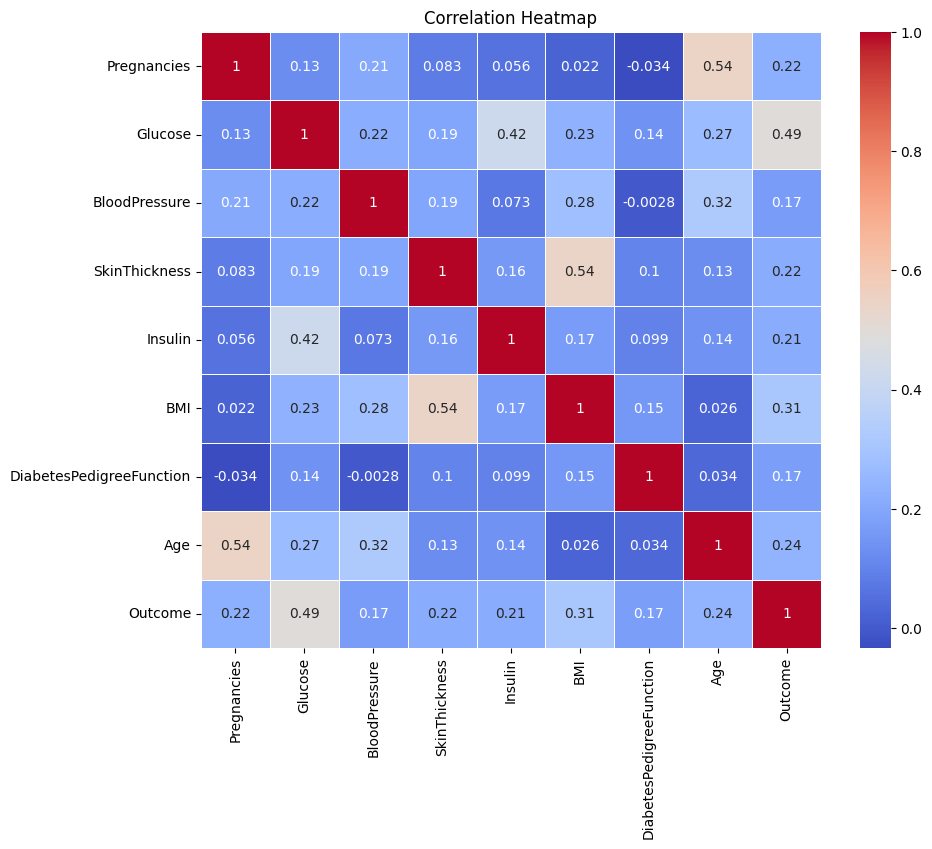

In [3]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



Number of outliers detected:
 Pregnancies                   4
Glucose                       0
DiabetesPedigreeFunction     29
SkinThickness                87
Insulin                     164
BMI                           8
Age                           9
dtype: int64

Total outliers: 301

Data shape after outlier removal: (523, 8)


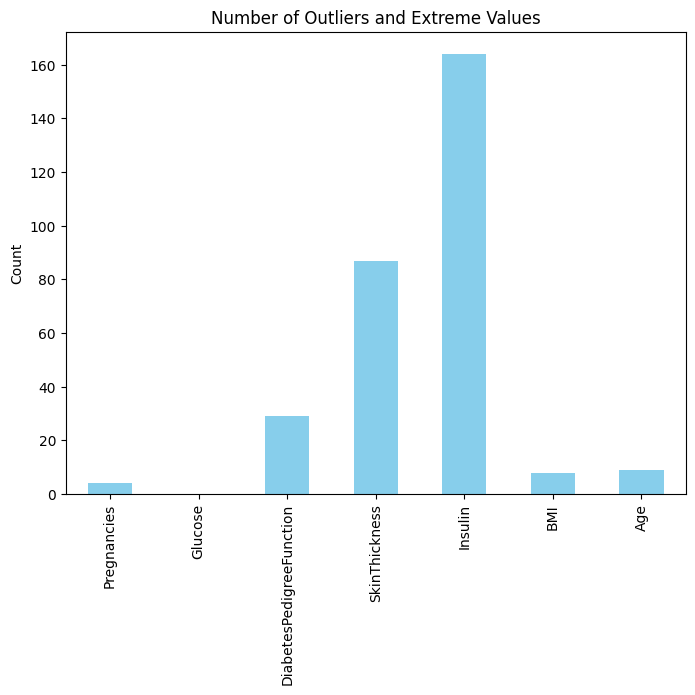

In [4]:
# Detecting and removing outliers and extreme values using the IQR method

# Select top highly correlated features
high_corr_features = ['Pregnancies','Glucose','DiabetesPedigreeFunction','SkinThickness','Insulin','BMI','Age']
data = data[high_corr_features + ['Outcome']]  # Keeping the target variable 'Outcome'

Q1 = data[high_corr_features].quantile(0.25)
Q3 = data[high_corr_features].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers and extreme values
outliers = ((data[high_corr_features] < lower_bound) | (data[high_corr_features] > upper_bound)).sum()
print("\nNumber of outliers detected:\n", outliers)

# Counting total number of outliers
total_outliers = outliers.sum()
print(f"\nTotal outliers: {total_outliers}")

# Removing outliers
data_clean = data[~((data[high_corr_features] < lower_bound) | (data[high_corr_features] > upper_bound)).any(axis=1)]

# Checking the shape of the data after outlier removal
print(f"\nData shape after outlier removal: {data_clean.shape}")

# Number of remaining instances should be 699 after outlier removal
#
# Plotting the number of outliers and extreme values
plt.figure(figsize=(8, 6))
outliers_count = outliers.plot(kind='bar', color='skyblue')
plt.title("Number of Outliers and Extreme Values")
plt.ylabel("Count")
plt.show()



Summary statistics after normalization (Min-Max Scaling):
        Pregnancies     Glucose  DiabetesPedigreeFunction  SkinThickness  \
count   523.000000  523.000000                523.000000     523.000000   
mean      0.311516    0.498878                  0.300208       0.510009   
std       0.254117    0.184145                  0.222469       0.207512   
min       0.000000    0.000000                  0.000000       0.000000   
25%       0.076923    0.369281                  0.137916       0.444444   
50%       0.230769    0.470588                  0.224618       0.524201   
75%       0.461538    0.607843                  0.433513       0.555556   
max       1.000000    1.000000                  1.000000       1.000000   

          Insulin         BMI         Age  
count  523.000000  523.000000  523.000000  
mean     0.557047    0.437537    0.280773  
std      0.192159    0.193913    0.250192  
min      0.000000    0.000000    0.000000  
25%      0.604478    0.299363    0.066667  


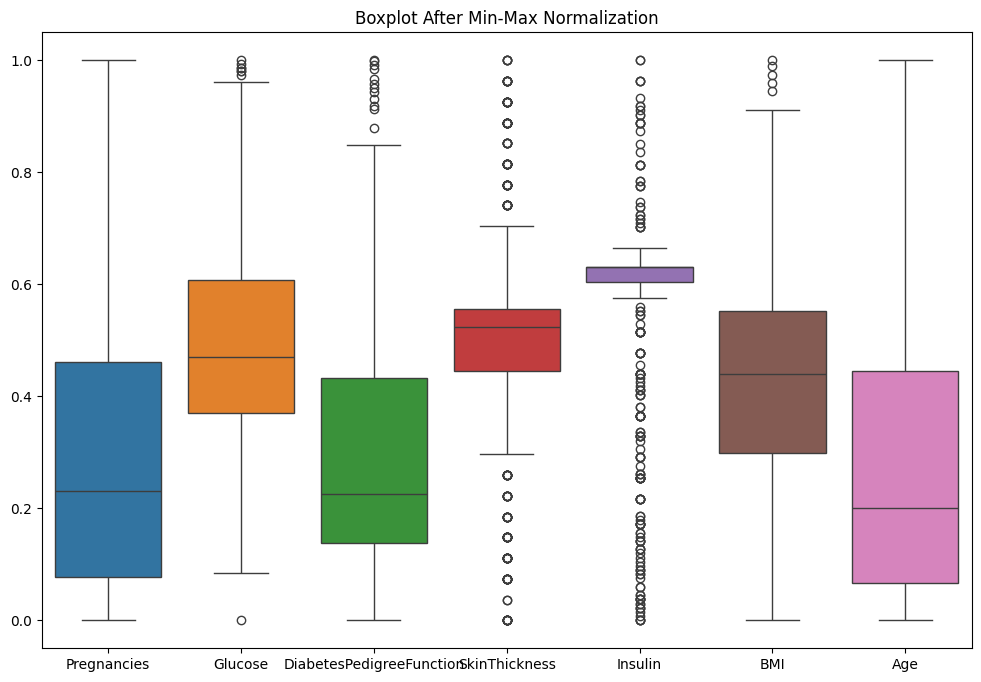

In [5]:
from sklearn.preprocessing import MinMaxScaler

X = data_clean.drop(columns=['Outcome'])
y = data_clean['Outcome']
# Feature scaling (Normalization) using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Summary statistics after normalization using MinMaxScaler
print("\nSummary statistics after normalization (Min-Max Scaling):\n", X_scaled_df.describe())

# Plotting the normalized data using MinMaxScaler
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_scaled_df)
plt.title("Boxplot After Min-Max Normalization")
plt.show()


In [ ]:
# Display mean and standard deviation before and after normalization
print("\nMean and Standard Deviation Before Normalization:\n", data_clean.describe().loc[['mean', 'std']])
print("\nMean and Standard Deviation After Normalization:\n", X_scaled_df.describe().loc[['mean', 'std']])



Mean and Standard Deviation Before Normalization:
       Pregnancies     Glucose  DiabetesPedigreeFunction  SkinThickness  \
mean     4.049713  120.328388                  0.412132      28.770233   
std      3.303518   28.174129                  0.247608       5.602823   

         Insulin        BMI        Age   Outcome  
mean  145.644253  31.938656  33.634799  0.346080  
std    25.749244   6.088859  11.258649  0.476175  

Mean and Standard Deviation After Normalization:
       Pregnancies   Glucose  DiabetesPedigreeFunction  SkinThickness  \
mean     0.311516  0.498878                  0.300208       0.510009   
std      0.254117  0.184145                  0.222469       0.207512   

       Insulin       BMI       Age  
mean  0.557047  0.437537  0.280773  
std   0.192159  0.193913  0.250192  


In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression Parameters:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Logistic Regression Accuracy: 0.8571428571428571
Confusion Matrix:
 [[68  4]
 [11 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.85      0.67      0.75        33

    accuracy                           0.86       105
   macro avg       0.85      0.81      0.82       105
weighted avg       0.86      0.86      0.85       105



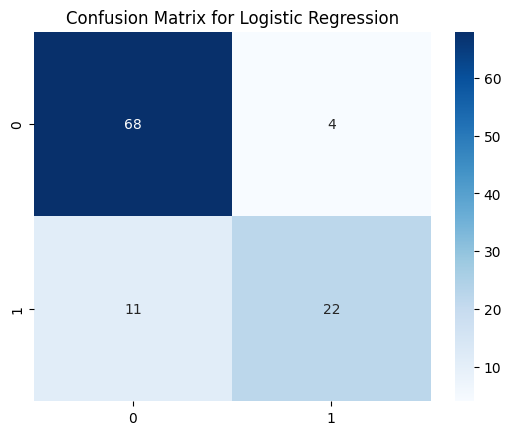

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

lr=accuracy_score(y_test, y_pred)
# Evaluation
print("Logistic Regression Parameters:\n", log_reg.get_params())
print("\nLogistic Regression Accuracy:",lr )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


SVM Parameters:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

SVM Accuracy: 0.8857142857142857
Confusion Matrix:
 [[70  2]
 [10 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        72
           1       0.92      0.70      0.79        33

    accuracy                           0.89       105
   macro avg       0.90      0.83      0.86       105
weighted avg       0.89      0.89      0.88       105



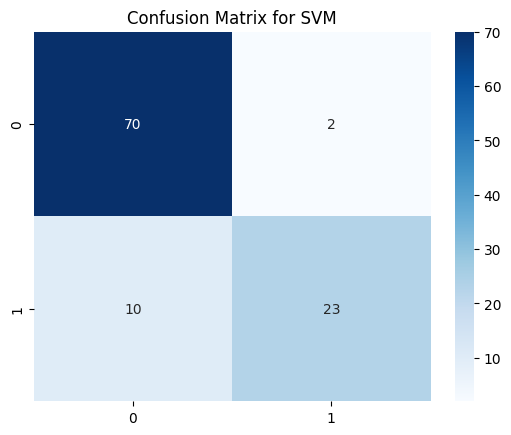

In [16]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

svm=accuracy_score(y_test, y_pred_svm)
# Evaluation
print("SVM Parameters:\n", svm_model.get_params())
print("\nSVM Accuracy:", svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()


Naive Bayes Parameters:
 {'priors': None, 'var_smoothing': 1e-09}

Naive Bayes Accuracy: 0.819047619047619
Confusion Matrix:
 [[63  9]
 [10 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        72
           1       0.72      0.70      0.71        33

    accuracy                           0.82       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.82      0.82      0.82       105



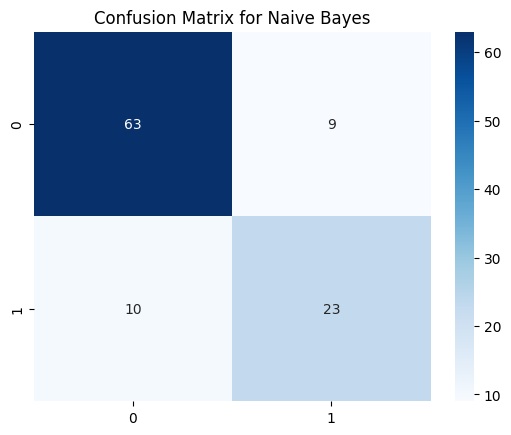

In [17]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

nb=accuracy_score(y_test, y_pred_nb)
# Evaluation
print("Naive Bayes Parameters:\n", nb_model.get_params())
print("\nNaive Bayes Accuracy:", nb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


Random Forest Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Random Forest Accuracy: 0.7523809523809524
Confusion Matrix:
 [[62 10]
 [16 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        72
           1       0.63      0.52      0.57        33

    accuracy                           0.75       105
   macro avg       0.71      0.69      0.70       105
weighted avg       0.74      0.75      0.74       105



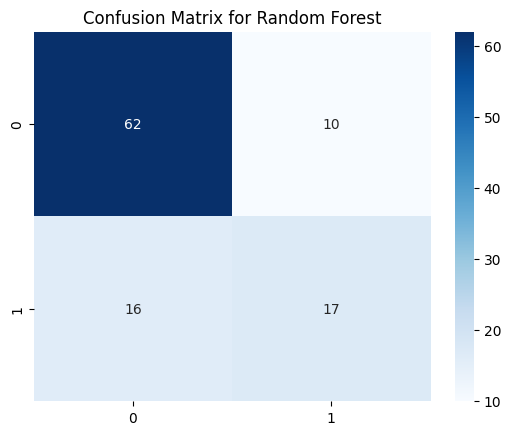

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

rf=accuracy_score(y_test, y_pred_rf)
# Evaluation
print("Random Forest Parameters:",rf_model.get_params())
print("\nRandom Forest Accuracy:", rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()


K-Nearest Neighbors Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

K-Nearest Neighbors Accuracy: 0.780952380952381
Confusion Matrix:
 [[62 10]
 [13 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        72
           1       0.67      0.61      0.63        33

    accuracy                           0.78       105
   macro avg       0.75      0.73      0.74       105
weighted avg       0.78      0.78      0.78       105



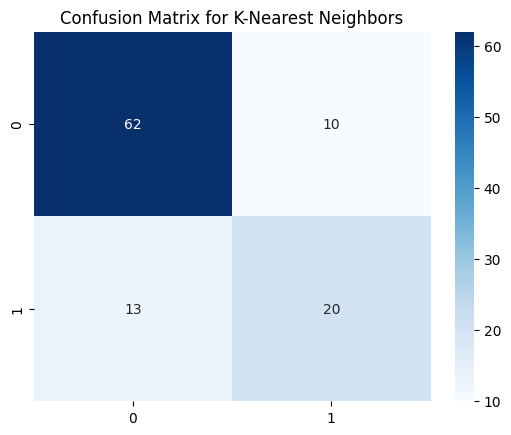

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

knn=accuracy_score(y_test, y_pred_knn)
# Evaluation
print("K-Nearest Neighbors Parameters:",knn_model.get_params())
print("\nK-Nearest Neighbors Accuracy:",knn )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()


Decision Tree Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Decision Tree Accuracy: 0.7619047619047619
Confusion Matrix:
 [[65  7]
 [18 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        72
           1       0.68      0.45      0.55        33

    accuracy                           0.76       105
   macro avg       0.73      0.68      0.69       105
weighted avg       0.75      0.76      0.75       105



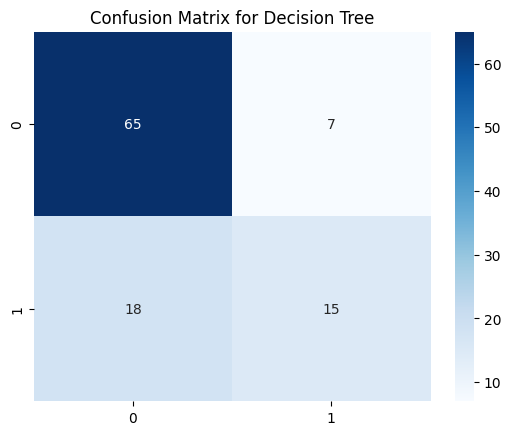

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=5)
dt_model.fit(X_train, y_train)

#{'criterion': 'entropy', 'max_depth': 5}
# Predictions
y_pred_dt = dt_model.predict(X_test)

dt=accuracy_score(y_test, y_pred_dt)
# Evaluation
print("Decision Tree Parameters:",dt_model.get_params())
print("\nDecision Tree Accuracy:", dt)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Parameters: {'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

AdaBoost Accuracy: 0.7428571428571429
Confusion Matrix:
 [[57 15]
 [12 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        72
           1       0.58      0.64      0.61        33

    accuracy                           0.74       105
   macro avg       0.70      0.71      0.71       105
weighted avg       0.75      0.74      0.75       105



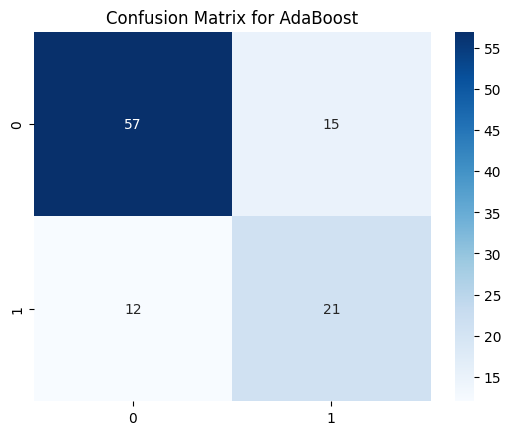

In [21]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost model
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred_ab = ab_model.predict(X_test)

ab= accuracy_score(y_test, y_pred_ab)
# Evaluation
print("AdaBoost Parameters:",ab_model.get_params())
print("\nAdaBoost Accuracy:",ab)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))
print("Classification Report:\n", classification_report(y_test, y_pred_ab))

# Confusion Matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_ab), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for AdaBoost")
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build Neural Network model
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'\nNeural Network Accuracy: {accuracy:.4f}')


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5662 - loss: 0.6930
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6692 - loss: 0.6860
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6228 - loss: 0.6826
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6721
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6828 - loss: 0.6487
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6561 - loss: 0.6403
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6613 - loss: 0.6345
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6066 - loss: 0.6593
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 0.6357
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6660 - loss: 0.6135
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6635 - loss: 0.6090
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [ ]:
nn_model.summary()
NN=accuracy

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 629 (2.46 KB)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 420 (1.64 KB)

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification
def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(26, activation='relu'))  # First hidden layer with 26 neurons
    model.add(Dense(5, activation='relu'))  # Second hidden layer with 5 neurons
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    optimizer = SGD(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the model
nn_model = create_model()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = nn_model.fit(X_train, y_train, epochs=400, batch_size=10,
                        validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

print(f'\nNeural Network Accuracy: {accuracy:.4f}')

Epoch 1/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6575 - loss: 0.6886 - val_accuracy: 0.6548 - val_loss: 0.6840
Epoch 2/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6353 - loss: 0.6840 - val_accuracy: 0.6548 - val_loss: 0.6780
Epoch 3/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6509 - loss: 0.6758 - val_accuracy: 0.6548 - val_loss: 0.6730
Epoch 4/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6677 - loss: 0.6683 - val_accuracy: 0.6548 - val_loss: 0.6693
Epoch 5/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6355 - loss: 0.6706 - val_accuracy: 0.6548 - val_loss: 0.6656
Epoch 6/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6226 - loss: 0.6711 - val_accuracy: 0.6548 - val_loss: 0.6627
Epoch 7/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6404 - loss: 0.6646 - val_accuracy: 0.6548 - val_loss: 0.6604
Epoch 8/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6457 - loss: 0.6592 - val_accuracy: 0.6548 - 

In [31]:
nn_model.summary()
NN=accuracy

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 26)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 5)                   │             135 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339 (1.33 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


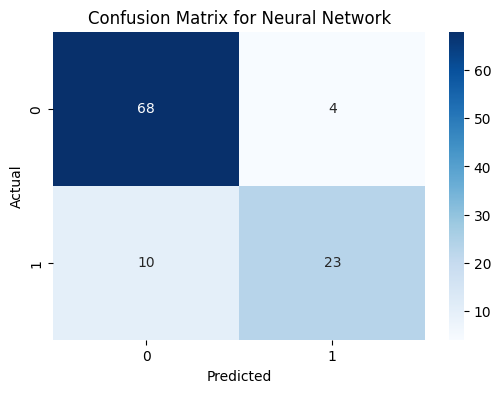

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        72
           1       0.85      0.70      0.77        33

    accuracy                           0.87       105
   macro avg       0.86      0.82      0.84       105
weighted avg       0.87      0.87      0.86       105



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels and y_pred is the predicted labels from the neural network
y_pred = nn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary classes (threshold 0.5)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Neural Network")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


In [33]:
import pandas as pd

# Store the model names and their respective accuracy scores in a dictionary
model_accuracy = {
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'AdaBoost', 'Neural Network'],
    'Accuracy': [lr, svm, nb, knn, rf, dt, ab, NN]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(model_accuracy)

# Display the DataFrame
print(accuracy_df)


                 Model  Accuracy
0  Logistic Regression  0.857143
1                  SVM  0.885714
2          Naive Bayes  0.819048
3                  KNN  0.780952
4        Random Forest  0.752381
5        Decision Tree  0.761905
6             AdaBoost  0.742857
7       Neural Network  0.866667


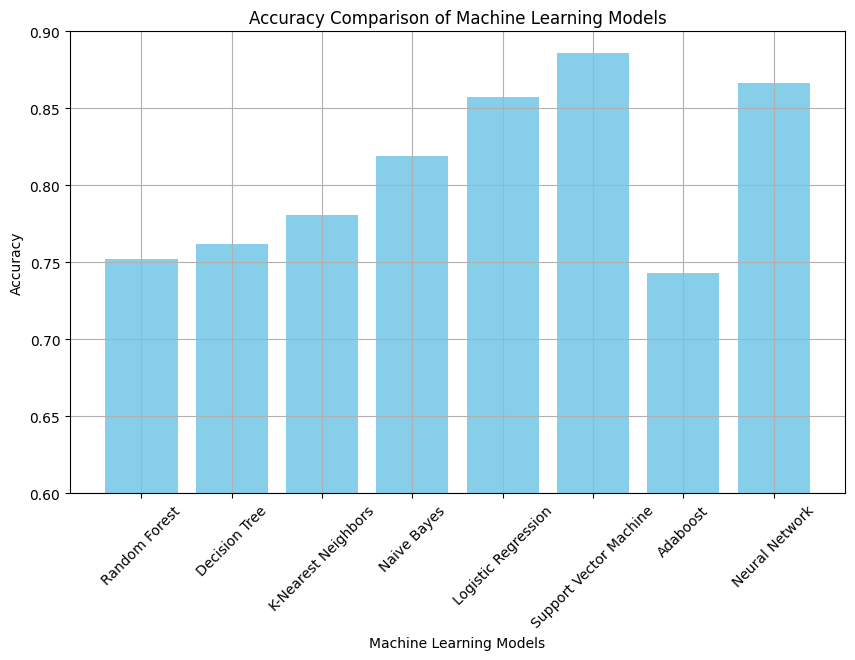

In [34]:
# List of model names for the x-axis
NN=accuracy
model_names = ["Random Forest", "Decision Tree", "K-Nearest Neighbors", "Naive Bayes", "Logistic Regression", "Support Vector Machine","Adaboost","Neural Network"]
# List of accuracy scores for the y-axis
accuracy_scores = [rf,dt,knn,nb,lr,svm,ab,NN]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0.6, 0.9)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build Neural Network model
nn_model = Sequential()
nn_model.add(Dense(26, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='sigmoid'))
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'\nNeural Network Accuracy: {accuracy:.4f}')




Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6807 - loss: 0.6480
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6148 - loss: 0.6642
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.6742
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - loss: 0.6154
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6410 - loss: 0.6443
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6017 - loss: 0.6630
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6142
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6031 - loss: 0.6525
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6464 - loss: 0.6248
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - loss: 0.6076
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - loss: 0.5834
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Function to build and evaluate a neural network model
def build_and_train_nn(layers, epochs, X_train, y_train, X_test, y_test):
    # Create the model
    model = Sequential()

    # Input Layer
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

    # Adding the hidden layers
    for units in layers:
        model.add(Dense(units, activation='relu'))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'\nNeural Network with {len(layers)} Hidden Layer(s) and {epochs} Epochs: Accuracy: {accuracy:.4f}')
    return model

# Train the neural network with 1 hidden layer and varying epochs
print("Neural Network with 1 Hidden Layer:")
nn_1_hidden_200 = build_and_train_nn([12], 200, X_train, y_train, X_test, y_test)
nn_1_hidden_400 = build_and_train_nn([12], 400, X_train, y_train, X_test, y_test)
nn_1_hidden_800 = build_and_train_nn([12], 800, X_train, y_train, X_test, y_test)


Neural Network with 1 Hidden Layer:
Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: 0.7002
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - loss: 0.6784
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - loss: 0.6638
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.6446
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.6530
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6513 - loss: 0.6401
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.6459
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5853 - loss: 0.6562
Epoch 9/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6146 - loss: 0.6442
Epoch 10/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - loss: 0.6152
Epoch 11/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6352 - loss: 0.6240
Epoch 12/200
42/42 ━━━━━━━━

In [ ]:
# Train the neural network with 2 hidden layers and varying epochs
print("Neural Network with 2 Hidden Layers:")
nn_2_hidden_200 = build_and_train_nn([26, 12], 200, X_train, y_train, X_test, y_test)
nn_2_hidden_400 = build_and_train_nn([26, 12], 400, X_train, y_train, X_test, y_test)
nn_2_hidden_800 = build_and_train_nn([26, 12], 800, X_train, y_train, X_test, y_test)


Neural Network with 2 Hidden Layers:
Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4248 - loss: 0.7087
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6352 - loss: 0.6767
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 0.6842
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.6587
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 0.6554
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - loss: 0.6290
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6270
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - loss: 0.6295
Epoch 9/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.6247
Epoch 10/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - loss: 0.6071
Epoch 11/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7119 - loss: 0.5812
Epoch 12/200
42/42 ━━━━━━━

In [ ]:
# Summary of the results
print("\nSummary of Neural Network Performance:")
print("1 Hidden Layer - 200 Epochs: Accuracy - ", nn_1_hidden_200.evaluate(X_test, y_test)[1])
print("1 Hidden Layer - 400 Epochs: Accuracy - ", nn_1_hidden_400.evaluate(X_test, y_test)[1])
print("1 Hidden Layer - 800 Epochs: Accuracy - ", nn_1_hidden_800.evaluate(X_test, y_test)[1])

print("2 Hidden Layers - 200 Epochs: Accuracy - ", nn_2_hidden_200.evaluate(X_test, y_test)[1])
print("2 Hidden Layers - 400 Epochs: Accuracy - ", nn_2_hidden_400.evaluate(X_test, y_test)[1])
print("2 Hidden Layers - 800 Epochs: Accuracy - ", nn_2_hidden_800.evaluate(X_test, y_test)[1])



Summary of Neural Network Performance:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8235 - loss: 0.3743 
1 Hidden Layer - 200 Epochs: Accuracy -  0.7904762029647827
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8273 - loss: 0.4169 
1 Hidden Layer - 400 Epochs: Accuracy -  0.800000011920929
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7683 - loss: 0.4582 
1 Hidden Layer - 800 Epochs: Accuracy -  0.7333333492279053
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7881 - loss: 0.4687 
2 Hidden Layers - 200 Epochs: Accuracy -  0.761904776096344
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7180 - loss: 0.5972 
2 Hidden Layers - 400 Epochs: Accuracy -  0.7142857313156128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7510 - loss: 0.8897 
2 Hidden Layers - 800 Epochs: Accuracy -  0.723809540271759


In [35]:
from sklearn.model_selection import cross_val_score

# Cross-validation function for all models
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=10)
    print(f"Cross-validation Accuracy: {scores.max():.4f}")

# Example for Logistic Regression CV
print("\nLogistic Regression:")
cross_validate_model(log_reg, X_scaled, y)
print("\nSVM:")
cross_validate_model(svm_model, X_scaled, y)
print("\nNaive Bayes:")
cross_validate_model(nb_model, X_scaled, y)
print("\nRandom Forest:")
cross_validate_model(rf_model, X_scaled, y)
print("\nK-Nearest Neighbors:")
cross_validate_model(knn_model, X_scaled, y)
print("\nDecision Tree:")
cross_validate_model(dt_model, X_scaled, y)
print("\nAdaBoost:")
cross_validate_model(ab_model, X_scaled, y)


# Similarly, you can apply cross-validation to other models



Logistic Regression:
Cross-validation Accuracy: 0.7925

SVM:
Cross-validation Accuracy: 0.7925

Naive Bayes:
Cross-validation Accuracy: 0.8302

Random Forest:
Cross-validation Accuracy: 0.8113

K-Nearest Neighbors:
Cross-validation Accuracy: 0.8462

Decision Tree:
Cross-validation Accuracy: 0.7885

AdaBoost:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-validation Accuracy: 0.8113


Logistic Regression Best Params: {'C': 10, 'solver': 'liblinear'}, Accuracy: 0.8476190476190476
SVM Best Params: {'C': 1, 'kernel': 'rbf'}, Accuracy: 0.8
Naive Bayes Accuracy: 0.819047619047619
Random Forest Best Params: {'max_depth': None, 'n_estimators': 100}, Accuracy: 0.7904761904761904
KNN Best Params: {'n_neighbors': 7, 'weights': 'uniform'}, Accuracy: 0.780952380952381
Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': 5}, Accuracy: 0.7523809523809524


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Best Params: {'learning_rate': 1.0, 'n_estimators': 50}, Accuracy: 0.7333333333333333


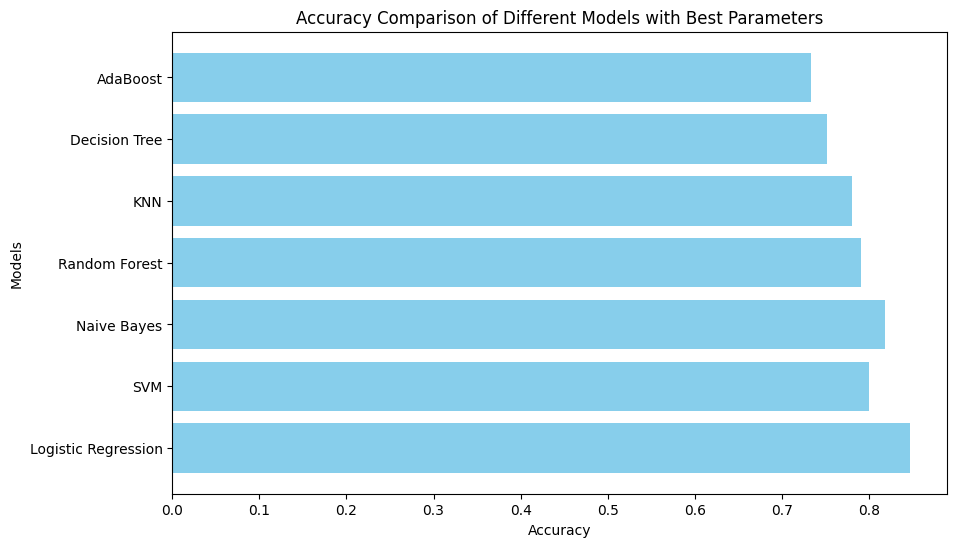

Logistic Regression Best Parameters: {'C': 10, 'solver': 'liblinear'}
SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}
Naive Bayes Best Parameters: Default parameters
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 100}
KNN Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}


In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List to store model names, best accuracy, and corresponding best parameters
model_names = []
best_accuracies = []
best_params = []

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
model_names.append('Logistic Regression')
best_accuracies.append(lr_acc)
best_params.append(grid_lr.best_params_)
print(f"Logistic Regression Best Params: {grid_lr.best_params_}, Accuracy: {lr_acc}")

from sklearn.svm import SVC
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
model_names.append('SVM')
best_accuracies.append(svm_acc)
best_params.append(grid_svm.best_params_)
print(f"SVM Best Params: {grid_svm.best_params_}, Accuracy: {svm_acc}")

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
# Naive Bayes doesn't have many hyperparameters to tune
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
model_names.append('Naive Bayes')
best_accuracies.append(nb_acc)
best_params.append("Default parameters")
print(f"Naive Bayes Accuracy: {nb_acc}")

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
model_names.append('Random Forest')
best_accuracies.append(rf_acc)
best_params.append(grid_rf.best_params_)
print(f"Random Forest Best Params: {grid_rf.best_params_}, Accuracy: {rf_acc}")

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
model_names.append('KNN')
best_accuracies.append(knn_acc)
best_params.append(grid_knn.best_params_)
print(f"KNN Best Params: {grid_knn.best_params_}, Accuracy: {knn_acc}")

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param_grid_dt = {'max_depth': [5, 10, 20, None], 'criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
model_names.append('Decision Tree')
best_accuracies.append(dt_acc)
best_params.append(grid_dt.best_params_)
print(f"Decision Tree Best Params: {grid_dt.best_params_}, Accuracy: {dt_acc}")

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
param_grid_ab = {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1.0]}
grid_ab = GridSearchCV(ab, param_grid_ab, cv=5)
grid_ab.fit(X_train, y_train)
y_pred_ab = grid_ab.predict(X_test)
ab_acc = accuracy_score(y_test, y_pred_ab)
model_names.append('AdaBoost')
best_accuracies.append(ab_acc)
best_params.append(grid_ab.best_params_)
print(f"AdaBoost Best Params: {grid_ab.best_params_}, Accuracy: {ab_acc}")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, best_accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison of Different Models with Best Parameters')
plt.show()

# Print all best parameters for each model
for model, params in zip(model_names, best_params):
    print(f"{model} Best Parameters: {params}")
